# Na 22

   Channel  Counts
0        0       0
1        1       0
2        2       0
3        3       0
4        4       0


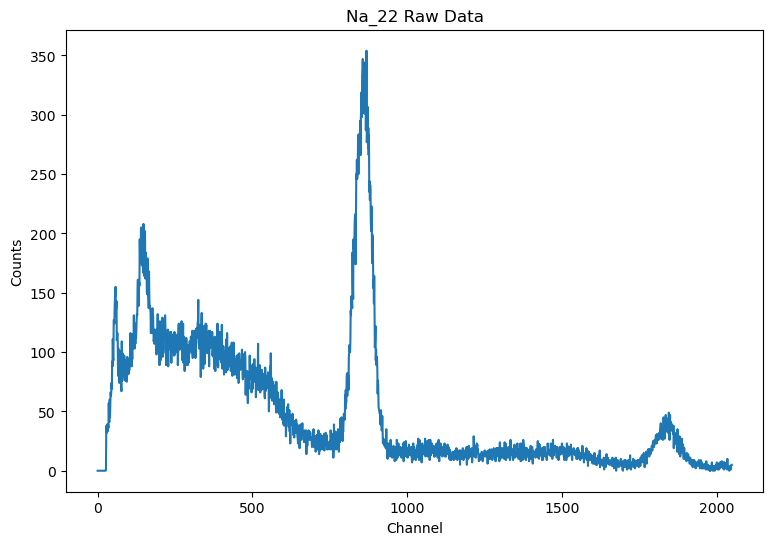

In [34]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import scipy.stats as stats

#convert csv file to pd data frame (df), check first 10 values with df.head

Na_22_df = pd.read_csv("Na_22.csv")
print(Na_22_df.head())

# label x and y df columns & make raw data plot

Na_22_x = Na_22_df["Channel"]
Na_22_y = Na_22_df["Counts"]

plt.figure(figsize=(9,6))
plt.xlabel("Channel")
plt.ylabel("Counts")
plt.title("Na_22 Raw Data")

plt.plot(Na_22_x, Na_22_y)
plt.show()

## Peak 1 & 2: 0.511 MeV & 1.2745 MeV

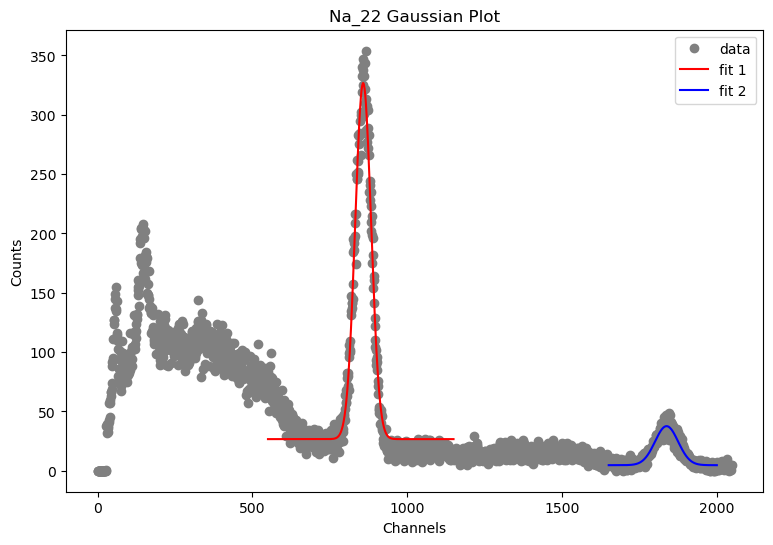

Fit Amplitude 1:  300.1224260484689 ± 2.8851306731732143 
 Fit Mean 1:  857.270291647736 ± 0.28075131739183123 
 Fit Epsilon 1:  660.6396794533364 ± 15.125311315642882 
 Fit C 1:  26.633031112122644 ± 0.7268651355888128


Fit Amplitude 2:  32.90484750962607 ± 0.578917851555919 
 Fit Mean 2:  1836.7386427282115 ± 0.7070129326381326 
 Fit Epsilon 2:  1386.5177449500757 ± 63.04781785162411 
 Fit C 2:  4.670823938746095 ± 0.2910716360516995


In [30]:
## define gaussian function with constants names 
def gaus(x, a, m, e, c):
    fit = a*np.exp(( -(x - m)**2) / (2 * e) ) + c
    return fit


## for peak 1:

# define x and y value ranges
Na_22_x_slice_1 = Na_22_x[550:1150]
Na_22_y_slice_1 = Na_22_y[550:1150]

# define popt1 and pcov1, solve for a1, m1, e1, and c1
Na_22_popt_1, Na_22_pcov_1 = curve_fit( gaus, Na_22_x_slice_1, Na_22_y_slice_1, p0 = [a1:=360, m1:=800, e1:=200, c1:=0])

#create gaussian with fitted values
Na_22_y_fit_1= gaus( Na_22_x_slice_1, *Na_22_popt_1)

        
## for peak 2:

# define x and y value ranges
Na_22_x_slice_2 = Na_22_x[1650:2000]
Na_22_y_slice_2 = Na_22_y[1650:2000]

# define popt2 and pcov2, solve for a2, m2, e2, and c2
Na_22_popt_2, Na_22_pcov_2 = curve_fit( gaus, Na_22_x_slice_2, Na_22_y_slice_2, p0 = [a2:=50, m2:=1800, e2:=35, c2:=0])

#create gaussian with fitted values
Na_22_y_fit_2= gaus( Na_22_x_slice_2, *Na_22_popt_2)

## plot both peaks in fit curve
plt.figure(figsize=(9,6))
plt.plot(Na_22_x, Na_22_y, color='gray', marker='o', ls='None', label="data")
plt.plot(Na_22_x_slice_1, Na_22_y_fit_1, 'r-', label='fit 1') # peak 1
plt.plot(Na_22_x_slice_2, Na_22_y_fit_2, 'b-', label='fit 2') # peak 2
plt.xlabel("Channels")
plt.ylabel("Counts")
plt.title("Na_22 Gaussian Plot")
plt.legend()
plt.show()

# print fit values of gaussian constants & uncertainties (sigma)
sigma_1 = np.sqrt(np.diag(Na_22_pcov_1))     
sigma_2 = np.sqrt(np.diag(Na_22_pcov_2))

print("Fit Amplitude 1: ", Na_22_popt_1[0], u"\u00B1" , sigma_1[0],
        "\n Fit Mean 1: ", Na_22_popt_1[1], u"\u00B1", sigma_1[1],
        "\n Fit Epsilon 1: ", Na_22_popt_1[2], u"\u00B1", sigma_1[2],
        "\n Fit C 1: ", Na_22_popt_1[3], u"\u00B1", sigma_1[3])
print("\n")
print("Fit Amplitude 2: ", Na_22_popt_2[0], u"\u00B1" , sigma_2[0],
        "\n Fit Mean 2: ", Na_22_popt_2[1], u"\u00B1", sigma_2[1],
        "\n Fit Epsilon 2: ", Na_22_popt_2[2], u"\u00B1", sigma_2[2],
        "\n Fit C 2: ", Na_22_popt_2[3], u"\u00B1", sigma_2[3])

# Known Energies Linear Fit Plot

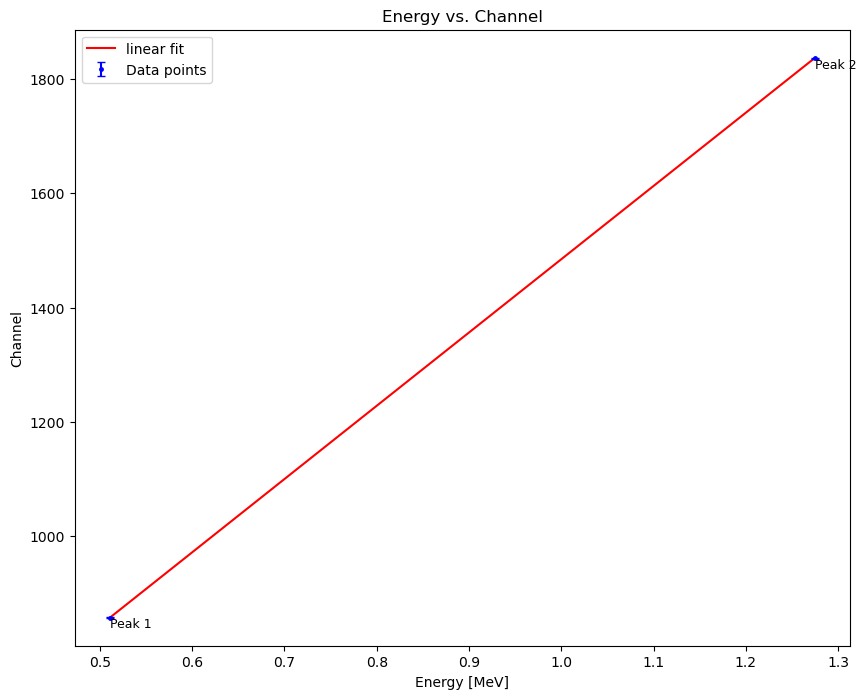

Slope = 1282.8662096666344 ± 0.0 
 Intercept = 201.72565850808587 ± 0.0


In [60]:
# y-axis data points & uncertainties
C_data = np.array([857.270291647736, 1836.7386427282115])
C_data_sigma = np.array([0.28075131739183123, 0.7070129326381326])

# x-axis data points & uncertainties 
E_data = np.array([0.511, 1.2745])

slope, intercept, r_value, p_value, std_err = stats.linregress(E_data, C_data)

parm = stats.linregress(E_data, C_data)

#plot linear fit & data points

plt.figure(figsize=(10,8))
plt.plot(E_data, parm.intercept + parm.slope*E_data, 'r-', label="linear fit")
plt.errorbar(E_data, C_data, yerr=C_data_sigma, fmt='.', color='blue', 
             label='Data points', markersize=5, capsize=3)

# add text labels for data points
data_labels = ['Peak 1', 'Peak 2']
for x, y, label in zip(E_data, C_data, data_labels):
    plt.text(x, y, label, fontsize=9, ha='left', va='top')
    
plt.xlabel('Energy [MeV]')
plt.ylabel('Channel')
plt.title('Energy vs. Channel')
plt.legend()
plt.show()

print("Slope =", parm.slope, u"\u00B1", parm.stderr,
         "\n Intercept =", parm.intercept,  u"\u00B1", parm.stderr)

# Energy Linear Fit for Element X:  $E = \frac{C-b}{m}$, 

In [ ]:
# identify variables 
